In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib

In [4]:
#Read the TAD file and generate a list of TAD intervals
def read_TADfile_2(file):
    '''
    :param bedfile:  name of bed file  
    :return ls:   list in the bed file
    '''
    f=open(file,"r")
    ls_3=[]
    #filename=filename.split('.')
    for line in f:
        x=line.strip('\n').split(' ')
        #print(len(x))
        if len(x)!=2:
            #x1=40000*(eval(x[0])-1)
            #x2=40000*eval(x[-2])
            ls_3.append([x[0],x[-2]])
    return ls_3

In [5]:
# draw the TAD rusults
def draw_heatmap_hierarchical(contact_matrix, TADlist, sub_TADlist, outputfilename):
    '''
    :param contact_matrix:  name of contact matrix file 
    :param TADlist:  name of TAD file
    :param sub_TADlist:  name of sub_TAD file
    :param outputfilename:  name of TAD results picture   
    :return :   TAD results picture
    '''    
    mtx = np.loadtxt(contact_matrix)
    mtx = mtx - np.diag(np.diag(mtx))
    for i in range(mtx.shape[0]):
        for j in range(mtx.shape[1]):
            mtx[i][j] = math.log2(mtx[i][j]+1)

    partition = TADlist
    sub_partition = sub_TADlist
    
    fig, ax = plt.subplots()
    img = ax.imshow(mtx, cmap='Reds')
    color1 = 'blue'
    color2 = 'green'
    linewidth = 0.03

    for community in sub_partition:
        ax.plot([eval(community[0]), eval(community[1])], [eval(community[0]), eval(community[0])], color=color2, linewidth=linewidth)
        ax.plot([eval(community[1]), eval(community[1])], [eval(community[0]), eval(community[1])], color=color2, linewidth=linewidth)

    for community in partition:
        ax.plot([eval(community[0]), eval(community[1])], [eval(community[0]), eval(community[0])], color=color1, linewidth=linewidth)
        ax.plot([eval(community[1]), eval(community[1])], [eval(community[0]), eval(community[1])], color=color1, linewidth=linewidth)

    
    line1 = matplotlib.lines.Line2D([], [], color=color1, label='RWR+deDoc')
    line2 = matplotlib.lines.Line2D([], [], color=color2, label='RWR+deDocwindow')
    ax.grid(False) 
    #line1 = mlines.Line2D([], [], color=color1, label='RWR+deDoc')
    #line2 = mlines.Line2D([], [], color=color2, label='RWR+deDocwindow')
    plt.legend(handles=[line1, line2])
    plt.savefig(outputfilename,dpi=3000,bbox_inches='tight')

In [6]:
TAD_file="./chr1.TAD"
sub_TAD_file="./chr1.window.TAD"

TADlist=read_TADfile_2(TAD_file)   
sub_TADlist=read_TADfile_2(sub_TAD_file)

contact_matrix='./contact_matrix_chr1.txt'

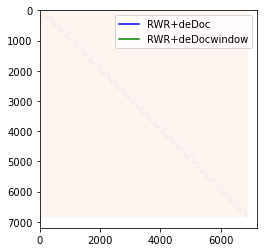

In [18]:
outputfilename="chr1.deDoc2.jpg"
draw_heatmap_hierarchical(contact_matrix, TADlist, sub_TADlist, outputfilename)